In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import os

In [2]:
model = tf.keras.models.load_model('leaf-cnn.h5')

In [3]:
categories = os.listdir("Leaf Diseases Dataset\Leaf Diseases Dataset(Augmented)\\train")
print(categories)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper_bell___Bacterial_spot', 'Pepper_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', '

In [4]:
image_path = "test\\test\PotatoEarlyBlight2.JPG"
new_img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255.0

In [5]:
prediction = model.predict(img)

Potato___Early_blight


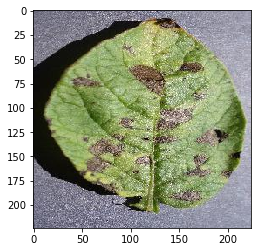

In [6]:
plt.imshow(new_img)
print(categories[np.argmax(prediction)])

In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
f = open("leaf-cnn.tflite",'wb')
f.write(tflite_model)
f.close()